## What is Concurrent Programming

Concurrent programming is when a number of processes, tasks or instructions happen at the same time. This is similar but not nessicarily the same of parallel programming. Concurrent programming can be strictly logical, meaning that multiple processes are logically running at the same time, however they only utilize the same processor. In this case the two proceses share the processor with only one process being active at a given time. 


<!-- ### Example
For example we could add two vectors together. In simple code this could be something like:
```python
def add_vectors(a, b, c, n):
    for i in range(n):
        c[i] = a[i] + b[i]
```
We could run each step of this code using somthing like:
```python
def add_vectors_element(a, b, c, i):
    c[i] = a[i] + b[i]
```
If we wanted to add the vectors `a` and `b` in parallel, we need to call `add_vectors_element` `n` times. We could run each of these `n` processes in parallel over `m` processors. Let's say `n = 32` and we have 16 cores available (`m = 16`) when we could run 16 tasks in parallel. Typically we would request 32 jobs and specify that we have 16 cores available, nievely we'd expect `n = 0` to run on `m = 0`, with `n = 16`, `m = 0` running when it finishes, but a scheduler will work by chosing which ever processor is free at the time. So we might have (`n = 0`, `m = 0`) and (`n = 1`, `m = 1`) starting at the same time, but (`n = 1`, `m = 1`) might finish first. The scheduler will therefore run (`n = 16`, `m = 1`).
 -->


 ## What is Threading

Threading is where we have multiple processes running concurrently, while utilizing a single processor<a name="cite_ref-2"></a>[<sup>[1]</sup>](#cite_note-1)
. Threading gives off the appearance of parallel processing by switching between tasks such that only one task is ever running at a given time. In this case the processes are "logically happening at the same time", but not parallel.

A example of this could be a web browser with multiple tabs open. In this analogy each tab is a seperate thread, but we're only ever looking at a single tab, therefore only one thread is ever executed at a time.

In programming, threading can be useful for expensive unrelated tasks such as downloading a file.
Consider the following example:


| Time Step | Main  | Child 1 | Child 2|
| -------- | -------- | -------- | -------- |
| 1 | spawns child 1|  | | 
| 2 | determine background criteria | downloading file | | 
| 3 | spawns child 2| downloading file | | 
| 4 | look up existing files | downloading file | Background calculation| 
| 5 | organise files | downloading file | <span style="color:red"> Background complete </span>| 
| 6 | select files of interest | <span style="color:red"> Download complete </span>|  <span style="color:red"> Background complete </span>| 
| 7 | close threads | <span style="color:red"> Download complete </span>|  <span style="color:red"> Background complete </span>| 
| 8 | perform analysis | | |


<a name="cite_note-1"></a>1. [^](#cite_ref-1) Note this is specifically the case in Python and may not be the case in other langugaes.

In [1]:
import threading
import time
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

Let's define some expensive funtion with some randomness to it:

In [2]:
def expensive_function(n):
    counter = 0
    for i in range(n):
        time.sleep(0.1)
        counter += i
    print (f"sum of {n} = {counter}")
    return counter

We can span a thread using 
``` python
t = threading.Thread(target = function_to_run, args = [arguments])
```

Let's create 16 threads:

In [12]:
n_threads = 16
threads = []
for i in range(n_threads):
    r = np.random.randint(1,50)
    threads.append( threading.Thread(target = expensive_function, args = [r]))


The threads won't start running until we call:
```
t.start()
```

This will make the function run the a seperate thread. We can wait for a thread to finish by calling:
```
t.join()
```

In [13]:
for t in threads:
    t.start()

time.sleep(1)
print ("This code will run while threads are running")


for t in threads:
    t.join()

print ("This code will wait until the threads are finished")

sum of 6 = 15
sum of 8 = 28
This code will run while threads are running
sum of 10 = 45
sum of 16 = 120
sum of 18 = 153
sum of 20 = 190
sum of 22 = 231
sum of 22 = 231
sum of 25 = 300
sum of 28 = 378
sum of 29 = 406
sum of 32 = 496
sum of 35 = 595
sum of 37 = 666
sum of 41 = 820
sum of 49 = 1176
This code will wait until the threads are finished


Let's perform vector addition using threading. We'll use `global` to ensure we're working on the global `a`, `b`, and `c` rather than a copy local to the function.

In [59]:
n = 200
a = [1] * n
b = [2] * n
c = [0] * n

def add_vectors(n):
    global a, b, c
    for i in range(n):
        c[i] = a[i] + b[i]



In [60]:
%%timeit
n = 200
a = [1] * n
b = [2] * n
c = [0] * n

add_vectors(n)


8.15 µs ± 19.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [61]:
print (c[:5])

[3, 3, 3, 3, 3]


Let's define a function that will only apply the addition to a single element of the array:

In [62]:
n = 200
a = [1] * n
b = [2] * n
c = [0] * n

def add_vectors_element(i):
    global a, b, c
    c[i] = a[i] + b[i]

add_vectors_element(0)
print (c[:5])


[3, 0, 0, 0, 0]


Let's spawn `n` threads and allow each thread to operate on a single element

In [19]:
%%timeit
n = 200
a = [1] * n
b = [2] * n
c = [0] * n


threads = []
for i in range(n):
    threads.append(threading.Thread(target = add_vectors_element, args = [i]))

for t in threads:
    t.start()
for t in threads:
    t.join()

7.18 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
print (c[:5])

[3, 3, 3, 3, 3]


## What is this slower?

There are a few reasons why. Firstly, spawning and waiting for threads to finish introduces and additional overhead, but it's not likely the major problem.

It is likely we are being blocked by the Global interpreter lock.


## What is the GIL

The GIL (Global interpreter lock) is a mechinism in CPython which allows only one instance of bytecode to be executed at a time. Essentially, to prevent data races.

## What is a data race/race condition

A data race or a race condition occurs when multiple processes try to modify and/or read the same piece of memory at the same time. 

This can result in the output of the code being dependent on the order in which the code is executed.

Consider two functions that act on the same object:


In [24]:
class MyObject:
    def __init__(self):
        self.property = 0

    def write(self):
        time.sleep(0.01)
        self.property = 5
    
    def read(self):
        time.sleep(0.01)
        if self.property != 5:
            print ("reading...")


What would happen if we took called `write` and `read` from two different threads? Would we see "reading..."?

In [63]:
obj = MyObject()
t1 = threading.Thread(target = obj.write)
t2 = threading.Thread(target = obj.read)

t1.start()
t2.start()

t1.join()
t2.join()

Is this always the case?

In [66]:
for i in range(100):
    obj = MyObject()
    t1 = threading.Thread(target = obj.write)
    t2 = threading.Thread(target = obj.read)
    
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()

reading...
reading...
reading...
reading...
reading...
reading...
reading...
reading...
reading...


Here the small and variable overhead in creating thread and starting threads creates behaviour that is difficult to reproduce and therefore difficult to debug. In cases like this we should wrap dependent jobs within the same thread to ensure the execution order.

No that we know what the GIL is, let's take a closer look at it's impact on our performance:

In [29]:
def countdown(n): 
    while n > 0: 
        n -= 1

In [67]:
large_number = 100_000_000
tstart = time.time()
countdown(large_number)
telap = time.time() - tstart

print (f"This took {telap : 0.3f} s")

This took  2.389 s


It would make sense that if we were able to do half the work in two threads running at the same time, then it should take half the time to run. Is this the case?

In [68]:
# run this in two seperate threads
t1 = threading.Thread(target = countdown, args = [large_number // 2])
t2 = threading.Thread(target = countdown, args = [large_number // 2])

tstart = time.time()
t1.start()
t2.start()
t1.join()
t2.join()

telap = time.time() - tstart

print (f"This took {telap : 0.3f} s")

This took  2.740 s


It actually takes about the same time to run, if not longer! This is because the GIL is making it such that only thread can run at a time. 

How can we get around this?

## Multiprocessing

Multiprocessing  is a method where instead of spawning a new thread, we spawn an entirely new process. This essentially means that we start a new instance of python, load what is needed into that instance and execute the code we want. 

The GIL will still be enforce, however each process will have it's own GIL, meaning the two can operate independently.

In [69]:
# run this in two seperate processes
p1 = mp.Process(target = countdown, args = [large_number // 2])
p2 = mp.Process(target = countdown, args = [large_number // 2])

tstart = time.time()
p1.start()
p2.start()
p1.join()
p2.join()

telap = time.time() - tstart

print (f"This took {telap : 0.3f} s")

This took  1.410 s


## What is Parallel Programming?

Parallel programming is when a number of processes, tasks or instructions are executed in parallel to each other. This can be obtained using a single CPU by threading or using multiple CPUs by multiprocessing, or some combination of both. In Python, threading will only give us logically parallel programming as the GIL limits true parallelization using threading. This is not the case in languages like C++.

<img src="./concurrent.JPG" alt="Concurrency" style="width:500px;"/>

## What is the Difference between Threading and Multiprocessing?

As we've seen, Threading, in Python, is limited to one task at a time by the GIL. Threading achieves the appearance of true parallelization by switching between tasks. 

Multiprocessing explicitly creates a new python process. As a result, we copy data into the new instant. This allows us to get around the GIL and obtain true parallelization. However, since we are required to copy memory into the instance, we cannot, by default, share memory across different threads. We'll look into how to do this later...

Consider the following example of a function that logs the time inbetween interations of a loop


In [52]:
def track_live_time(x):
    t = []
    for i in range(10**6):
        # log the current time
        t.append(time.time())
    # return array of times
    return np.array(t)

For this example I'll use `concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor` because they have a very similar API.

In [70]:
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor


def multi_threading(func, args, workers):
    with ThreadPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

def multi_processing(func, args, workers):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

let's run 10 tasks across 4 workers.

Here the workers are the number of threads or processes we're using:

In [71]:
n = 10
workers = 4
r = np.random.randint(1, 10, size = n)

tstart = time.time()
[track_live_time(r) for i in range(n)]
telap = time.time() - tstart 
print(f"Serial took: {telap:0.5} s")

tstart = time.time()
live_times_threading = multi_threading(track_live_time, r, workers)
telap = time.time() - tstart 
print(f"Multithreading took: {telap:0.5} s")

tstart = time.time()
live_times_processing = multi_processing(track_live_time, r, workers)
telap = time.time() - tstart 
print(f"Multiprocessing took: {telap:0.5} s")


Serial took: 1.3956 s
Multithreading took: 1.3856 s
Multiprocessing took: 0.76431 s


We can see that the multithreaded example takes about as long as the serial example. But the multiprocessing example takes about half the time.

Let's plot the times logged by each:

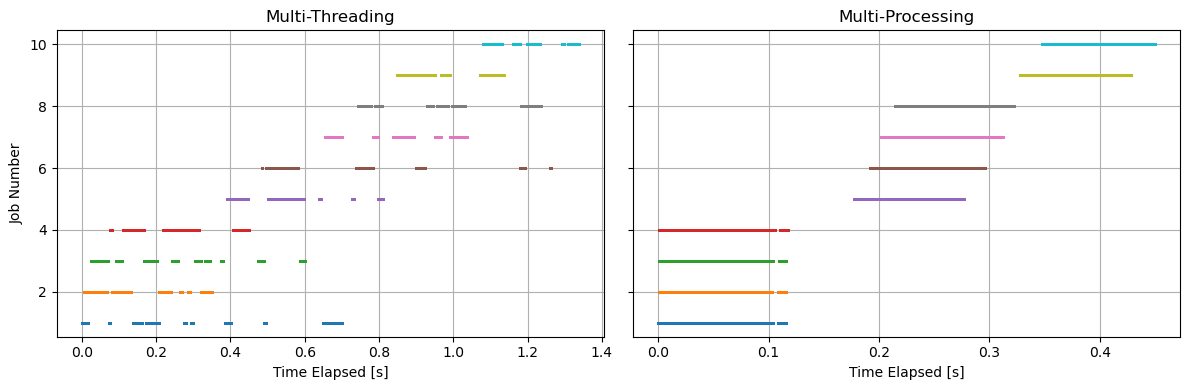

In [72]:
fig, axs = plt.subplots(1,2, figsize = (12,4), sharey= True)
for i in range(len(live_times_threading)):
    axs[0].plot(
        live_times_threading[i] - np.min(live_times_threading),
        np.ones(len(live_times_threading[i])) + i,
        "o",
        ms = 0.5)
    
    axs[1].plot(
        live_times_processing[i] - np.min(live_times_processing),
        np.ones(len(live_times_processing[i])) + i,
        "o",
        ms = 0.5)
for ax in axs:
    ax.grid()
    ax.set_xlabel("Time Elapsed [s]")
axs[0].set_ylabel("Job Number")

axs[0].set_title("Multi-Threading")
axs[1].set_title("Multi-Processing")

fig.tight_layout()
fig.savefig("multi.png")

We see gaps in the multi-threaded example. This is because we are switching between threads as the code is ran. However in the multi-processing example we are running 4 instances at the same time.

## Returning to the vector addition:

Let's return to the vector example and try to run it with multiprocessing

In [73]:
#%%timeit
n = 200
a = [1] * n
b = [2] * n
c = [0] * n

with mp.Pool(processes = 16) as pool:
    pool.map(add_vectors_element, range(n))

In [74]:
print (c[:4])

[0, 0, 0, 0]


What happened here? `c` should be a list with 200 values of `3`. We specifically used `global` in `add_vectors_element` to specify we're using the global value of `c` not the local value. 

```python
def add_vectors_element(i):
    global a, b, c
    c[i] = a[i] + b[i]
```

It looks like the global value of `c` wasn't modified by multiprocessing. This is because we've created entirely new instances of python to run our process through. This includes a new `global c` which is local to the child process and not the main process.

By copying the variables that are need from the main to the child process and running as a new python process, multiprocessing circumvents the GIL. Each process will have its own local variables and its own GIL. This means a "lock" will be issued when each process is modifying their own instance of `c`, but since these aren't shared, there is no mutual lock preventing the processes from running at the same time.

How could we rewrite this to get our desired output?

In [75]:
from multiprocessing import shared_memory
import sys
c_shared = shared_memory.SharedMemory(create=True, size=sys.getsizeof(c))


In [76]:
def add_vectors_element_shared(i):
    global a, b, c_shared
    c_shared.buf[i] = a[i] + b[i]

In [77]:
with mp.Pool(processes = 16) as pool:
    pool.map(add_vectors_element_shared, range(n))

In [78]:
[c_shared.buf[i] for i in range(4)]


[3, 3, 3, 3]

In [79]:
c_shared.close()
c_shared.unlink()

Another way could be to split the task into chunk and then combine the chunks from each task.

In [80]:
def add_vectors_parallel(n, chunk):
    global a, b
    c = []
    for i in range(n * chunk, (n+1) * chunk):
        if i >= len(a):
            return c
        c.append(a[i] + b[i])
    return c


In [81]:
n = 200
a = [1] * n
b = [2] * n
c = [0] * n

res = add_vectors_parallel(0, 3)
print (res[:5])

[3, 3, 3]


In [82]:
# %%timeit
n_proc = 8
n = 200
# Adding a little over subscription to ensure we fill all elements
over_sub  = 0.3
chunk = int(n // (n_proc - 1))

a = [1] * n
b = [2] * n
with mp.Pool(n_proc) as pool:
    res = pool.starmap(add_vectors_parallel, [[i, chunk] for i in range(n_proc)])




In [83]:
final = np.array([])
for r in res:
    print (len(r))
    final = np.append(final, r)
print (final[:5])
print (final.shape)
print (final.sum() / n)

28
28
28
28
28
28
28
4
[3. 3. 3. 3. 3.]
(200,)
3.0


## Taking a closer look at multiprocessing

Multiprocessing has different ways to execute in parallel. Let's take alook at:
* map
* starmap

In [89]:
def parallel_task(i):
    time.sleep(0.1)
    print(f"Running task: {i}")
    return i*i

In [91]:
with mp.Pool(processes=4) as pool:
    res = pool.map(parallel_task, range(10))
print (res)

Running task: 0Running task: 3

Running task: 2
Running task: 1
Running task: 4Running task: 5

Running task: 6
Running task: 7
Running task: 8Running task: 9

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


How do we pass multiple arguments?

We can use starmap!

In [98]:
def parallel_task_with_arg(i, number):
    time.sleep(0.1)
    print(f"Running task: {i}, with number {number}")
    return i*number

In [101]:
with mp.Pool(processes=4) as pool:
    arguments = [(i, np.random.random()) for i in range(10)]
    res = pool.starmap(parallel_task_with_arg, arguments)
print (res)

Running task: 0, with number 0.9485979316997868Running task: 1, with number 0.5395337513089026Running task: 2, with number 0.28013889341958087Running task: 3, with number 0.5752552495120759



Running task: 4, with number 0.19117026413827765Running task: 5, with number 0.8768078872759388Running task: 6, with number 0.8529407224083398Running task: 7, with number 0.644406631619091



Running task: 8, with number 0.08242269827131332Running task: 9, with number 0.7439961150318876

[0.0, 0.5395337513089026, 0.5602777868391617, 1.7257657485362277, 0.7646810565531106, 4.384039436379695, 5.1176443344500395, 4.510846421333636, 0.6593815861705066, 6.695965035286988]


## Parallelizing with Numba

Numba is an awesome library that can really help turbo charge our code. Numba allows for automagic parallelization and just in time (JIT) compiling. JIT allows us to compile the Python code we write to machine code, often providing significant performace improvements.

In [137]:
def large_sum(n):
    counter = 0
    for i in range(n):
        counter +=1
    return counter


In [138]:
%%time 
res = large_sum(10**5)
print (res)

100000
CPU times: user 3.5 ms, sys: 0 ns, total: 3.5 ms
Wall time: 3.48 ms


In [139]:
%timeit large_sum(10**5)

2.58 ms ± 84.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [140]:
from numba import jit
@jit
def large_sum_jit(n):
    counter = 0
    for i in range(n):
        counter +=1
    return counter

In [141]:
%time large_sum_jit(10**5)

CPU times: user 34.2 ms, sys: 170 µs, total: 34.4 ms
Wall time: 33.5 ms


100000

This took longer.... What happened?

The first time we run a `jit`-ted function it is compiled! We will aways get poor performance the first time we run it!

In [142]:
%%time 
res = large_sum_jit(10**5)
print (res)

100000
CPU times: user 49 µs, sys: 0 ns, total: 49 µs
Wall time: 46.7 µs


In [143]:
%timeit large_sum_jit(10**5)

98.4 ns ± 3.81 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [144]:
def vector_addition_loop(x,y):
    z = np.zeros(x.shape)
    n = z.shape[0]

    for i in range(n):
        z[i] = x[i] + y[i]
    return z

In [145]:
x = np.random.random(size = 10**5)
y = np.random.random(size = 10**5)

In [146]:
%timeit _ = vector_addition_loop(x,y)

16.1 ms ± 465 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [147]:
@jit
def vector_addition_loop_jit(x,y):
    z = np.zeros(x.shape)
    n = z.shape[0]

    for i in range(n):
        z[i] = x[i] + y[i]
    return z

In [148]:
_ = vector_addition_loop_jit(x,y)

In [149]:
%timeit _ = vector_addition_loop_jit(x,y)

36.9 µs ± 980 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Automagic parallelization with `numba`. We can use `prange` to explicitly tell `numba` that a loop is to be ran in parallel across all available CPUs. We also ass `parallel = True` to the `@jit` decorator. Without `parallel = True` `prange` will behave the same as `range`.

`Numba` can parallelize a lot of common element/bitwise operations ([see here](https://numba.pydata.org/numba-doc/latest/user/parallel.html)):

* unary operators: + - ~
* binary operators: + - * / /? % | >> ^ << & ** //
* comparison operators: == != < <= > >=
* Numpy ufuncs that are supported in nopython mode.
* User defined DUFunc through vectorize().



In [150]:
from numba import prange
@jit(parallel= True)
def vector_addition_loop_jit_parallel(x,y):
    z = np.zeros(x.shape)
    n = z.shape[0]

    # Use prange to explicitly run a parallel loop
    for i in prange(n):
        z[i] = x[i] + y[i]
    return z

In [151]:
_ = vector_addition_loop_jit_parallel(x,y)

In [152]:
x = np.random.random(size = 10**7)
y = np.random.random(size = 10**7)

In [153]:
%timeit _ = vector_addition_loop_jit_parallel(x,y)

14.8 ms ± 908 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [154]:
%timeit _ = vector_addition_loop_jit(x,y)

16.3 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
